# Plotting some figures 

In [1]:
import os
import sys

import numpy as np
import pandas as pd

from tqdm import tqdm
from IPython.display import clear_output

import matplotlib.pyplot as plt

sys.path.insert(0, '../../../icenumerics/')
sys.path.insert(0, '../auxnumerics/')
sys.path.insert(0, '../')

import icenumerics as ice
import auxiliary as aux

from parameters import params

%reload_ext autoreload
%autoreload 2

ureg = ice.ureg
idx = pd.IndexSlice

In [2]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [3]:
DATA_PATH = '../../data/test11'
MOUNT_DRIVE = '/home/frieren/BIG/'
PROJECT = 'reentrancy'
DATA_PATH = os.path.join(MOUNT_DRIVE, PROJECT,'test11')
SIZE = 10

## Sanity check

Just checking the the field profile is correct

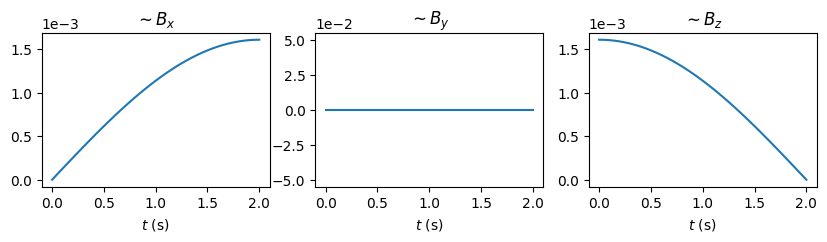

In [4]:
trj = ice.trajectory(os.path.join(DATA_PATH,str(SIZE),'2','20mT/trj10.csv'))
trj.load()
trj.profile()

## Counts vs angle (time)

In [5]:
# load the csv that has all counts for all total time (omega vals)
# and the complete timeseries
raw_data = pd.read_csv(os.path.join(DATA_PATH,'10','average_counts.csv'),index_col=['field','time'])

# compute the omega values, and theta as well
omega = np.pi/2/raw_data.total_time.to_numpy()

# append omega and theta to the df
raw_data['omega'] = np.around(omega,4)
raw_data['theta'] = raw_data.index.get_level_values('time') * raw_data.omega
raw_data

I     II  III     IV      V     VI  total_time   omega  \
field time                                                                 
20    0.00    0.000  0.000  1.0  0.000  0.000  0.000           1  1.5708   
      0.05    0.000  0.000  1.0  0.000  0.000  0.000           1  1.5708   
      0.10    0.000  0.000  1.0  0.000  0.000  0.000           1  1.5708   
      0.15    0.000  0.000  1.0  0.000  0.000  0.000           1  1.5708   
      0.20    0.000  0.000  1.0  0.000  0.000  0.000           1  1.5708   
...             ...    ...  ...    ...    ...    ...         ...     ...   
18    995.00  0.093  0.368  0.0  0.076  0.372  0.091        1000  0.0016   
      996.00  0.093  0.368  0.0  0.076  0.372  0.091        1000  0.0016   
      997.00  0.093  0.365  0.0  0.082  0.369  0.091        1000  0.0016   
      998.00  0.093  0.366  0.0  0.080  0.370  0.091        1000  0.0016   
      999.00  0.093  0.363  0.0  0.086  0.367  0.091        1000  0.0016   

                theta  
field time             
20    0.00    0.00000  
      0.05    0.07854  
      0.10    0.15708  
      0.15    0.23562  
      0.20    0.31416  
...               ...  
18    995.00  1.59200  
      996.00  1.59360  
      997.00  1.59520  
      998.00  1.59680  
      999.00  1.59840  

[302400 rows x 9 columns]

In [6]:
ws = raw_data.omega.unique()
ws = ws[ws <= 0.2]
print('selected values:')
print(ws)

selected values:
[0.1963 0.1745 0.1571 0.1428 0.1309 0.1208 0.1122 0.1047 0.0982 0.0924
 0.0873 0.0827 0.0785 0.0524 0.0393 0.0314 0.0224 0.0196 0.0175 0.0157
 0.0016]


In [118]:
import matplotlib.patches as patches
def plot_simple_colloids(ax, title, centers, dirs, sep=1/7, scale=0.6, color='gray'):
    for c,d in zip(centers,dirs):
        atom = (c+sep*d)*scale
        trap = (c-sep*d)*scale
        circle = patches.Circle((atom[0],atom[1]), 0.07, edgecolor='black', facecolor='none',linewidth=2)
        atom = patches.Circle((atom[0],atom[1]), 0.07, edgecolor='none', facecolor='#c02a2e')
        trap = patches.Circle((trap[0],trap[1]), 0.07, edgecolor='none', facecolor='#b1bfb3')

        # Add the circle to the plot
        ax.add_patch(circle) 
        ax.add_patch(atom) 
        ax.add_patch(trap) 
    
        #ax.scatter(*atom,c='#c02a2e',s=50)
        #ax.scatter(*trap,c='#b1bfb3',s=50)
        ax.set_title(title)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])

    ax.autoscale_view()
    #ax.set_facecolor(color,alpha=0.3)

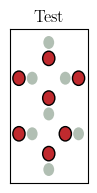

In [119]:
fig, ax = plt.subplots(figsize=(1,2))
centers = np.array([[0,0],[1,0],[1/2,1/2],[1/2,-1/2],[1/2,3/2],[0,1],[1,1]])
af4 = np.array([[1,0],[-1,0],[0,-1],[0,1],[0,1],[-1,0],[1,0]])
af2 = np.array([[-1,0],[-1,0],[0,-1],[0,1],[0,1],[1,0],[1,0]])
zero = np.array([[-1,0],[-1,0],[0,1],[0,1],[0,-1],[-1,0],[1,0]])


plot_simple_colloids(ax,'Test',centers,zero, color=colors[0])
plt.show()

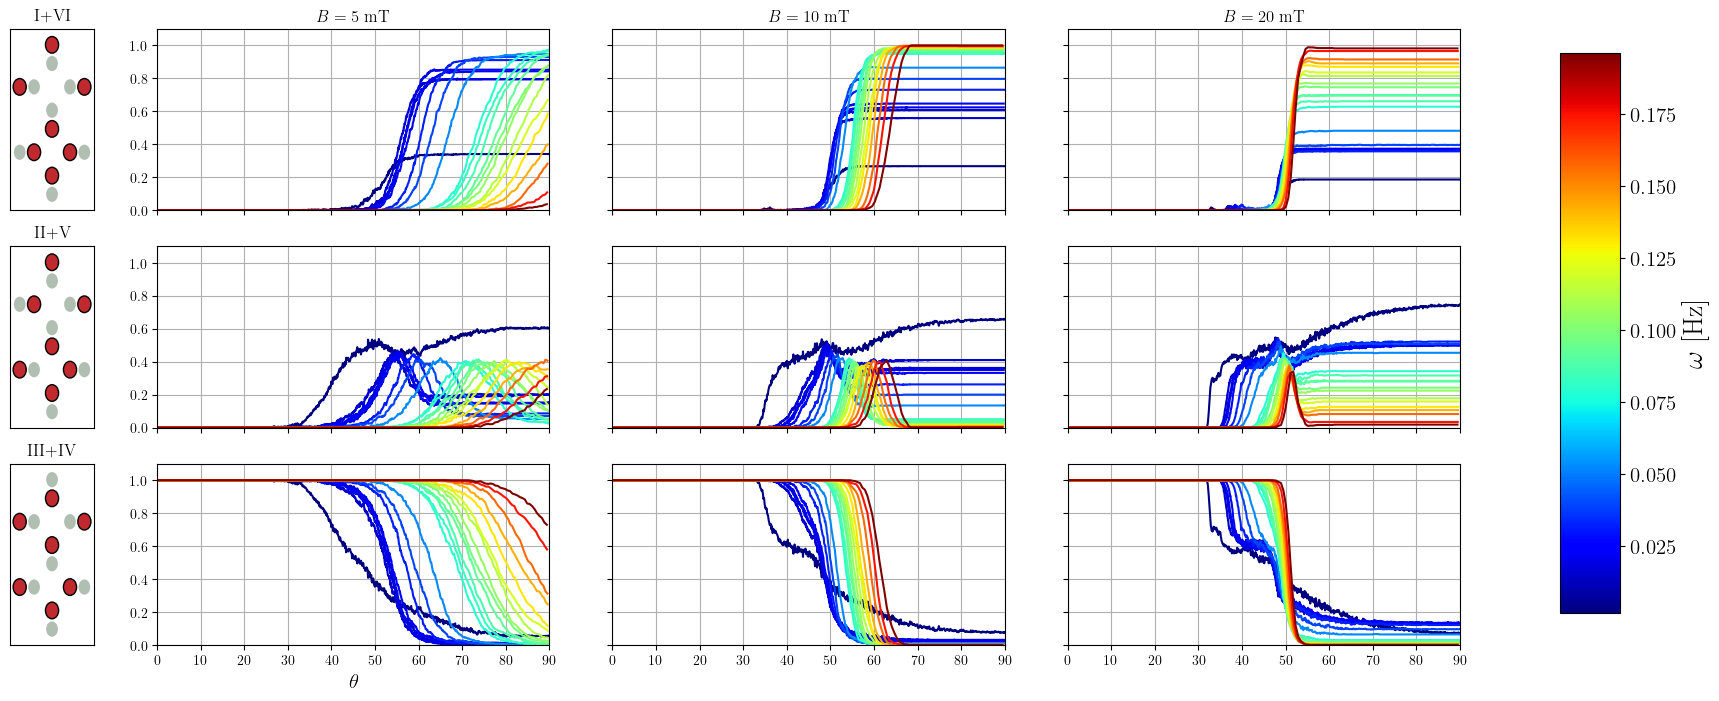

In [120]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 8),
                         gridspec_kw={
                           'width_ratios': [1.5, 7, 7 ,7],
                           'height_ratios': [1, 1, 1],
                           'wspace': 0.2,
                           'hspace': 0.2})

norm = plt.Normalize(min(ws),max(ws))
cmap = plt.get_cmap('jet')

field_values = [5,10,20]

for j,B in enumerate(field_values):
    # here j selects the column in which it is going to be plotted
    for i,(w,cdf_w) in enumerate(raw_data.groupby('omega')):
        if w not in ws:
            continue
        else:
            cdf_wB = cdf_w.xs(B,level='field')
            axes[0][j+1].plot(cdf_wB.theta*180/np.pi,cdf_wB.I + cdf_wB.VI, color = cmap(norm(w)))
            axes[0][j+1].set_title(f'$B = {B}$ mT')
            
            axes[1][j+1].plot(cdf_wB.theta*180/np.pi,cdf_wB.II + cdf_wB.V, color = cmap(norm(w)))
            
            axes[2][j+1].plot(cdf_wB.theta*180/np.pi,cdf_wB.III + cdf_wB.IV, color = cmap(norm(w)))

plot_simple_colloids(axes[0][0],'I+VI',centers,af4)
plot_simple_colloids(axes[1][0],'II+V',centers,af2)
plot_simple_colloids(axes[2][0],'III+IV',centers,zero)

# set the grids
for i in range(3):
    for j in range(1,4):
        axes[i][j].grid()
        axes[i][j].set_ylim(0,1.1)
        axes[i][j].set_xlim(0,90)
        
        if i<2:
            axes[i][j].set_xticklabels([])
        if j>1: 
            axes[i][j].set_yticklabels([])

axes[2][1].set_xlabel('$\\theta$',fontsize=15)

fig.subplots_adjust(right=0.85)  # Adjust the right space to make room for the colorbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])  # [left, bottom, width, height] for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label(label='$\\omega$ [Hz]',fontsize=20)
cbar.ax.tick_params(labelsize=15)

plt.show()

## Vertex counting

In [10]:
# here i want to know which is the top time for any given omega value
# since it does not reach the total_time stuff
omega_time = {w:df_w.index.get_level_values('time').max() for w,df_w in raw_data.groupby('omega')}
omegas = list(omega_time.keys())

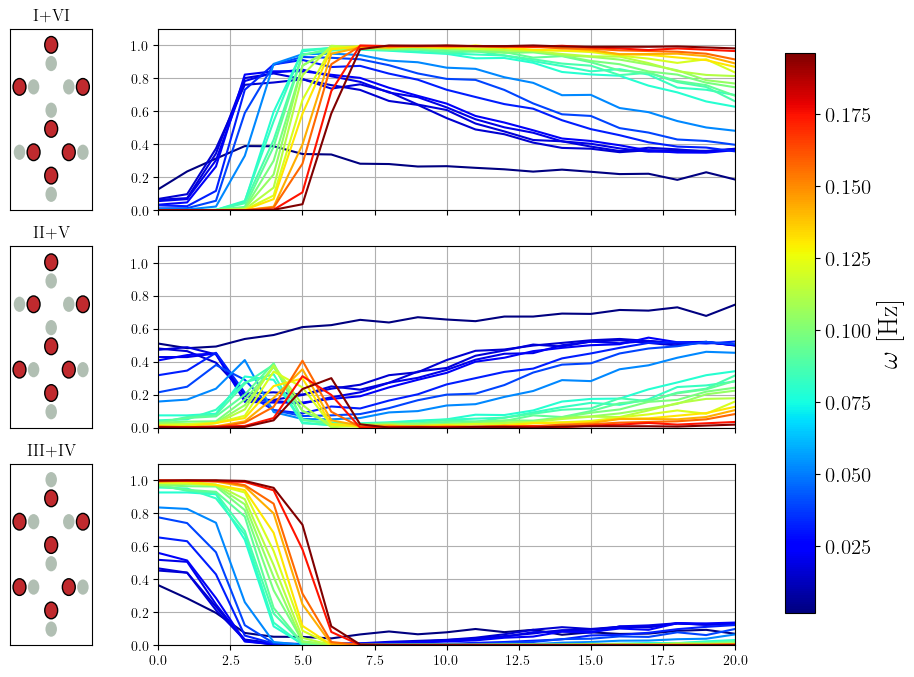

In [121]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 8),
                         gridspec_kw={
                           'width_ratios': [1, 7,],
                           'height_ratios': [1, 1, 1],
                           'wspace': 0.2,
                           'hspace': 0.2})

norm = plt.Normalize(min(omegas),max(ws))
cmap = plt.get_cmap('jet')

plot_simple_colloids(axes[0][0],'I+VI',centers,af4)
plot_simple_colloids(axes[1][0],'II+V',centers,af2)
plot_simple_colloids(axes[2][0],'III+IV',centers,zero)

# group by omegas
for w, cdf_omega in raw_data.groupby('omega'):
    if w not in ws:
            continue
    
    # then for some omega, select the last time in the simulation
    # this is done by putting the omega back in the dictionary
    # this gives a field series, then sort it by increasing field
    cdf_last = cdf_omega.xs(omega_time[w],level='time').sort_index()
    axes[0][1].plot(cdf_last.index.get_level_values('field'), cdf_last.I + cdf_last.VI, color=cmap(norm(w)) )
    axes[1][1].plot(cdf_last.index.get_level_values('field'), cdf_last.II + cdf_last.V, color=cmap(norm(w)) )
    axes[2][1].plot(cdf_last.index.get_level_values('field'), cdf_last.III + cdf_last.IV, color=cmap(norm(w)) )

for i in range(3):
    axes[i][1].set_xlim(0,20)
    axes[i][1].set_ylim(0,1.1)
    axes[i][1].grid()
    
    if i<2:
        axes[i][1].set_xticklabels([])


    
fig.subplots_adjust(right=0.85)  # Adjust the right space to make room for the colorbar
cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])  # [left, bottom, width, height] for the colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label(label='$\\omega$ [Hz]',fontsize=20)
cbar.ax.tick_params(labelsize=15)
   
plt.show()

# Area vs omega

In [53]:
def get_intersection(fields,x,tol=0.01):
    last = x[-1]
    
    for i,xi in enumerate(x[:-1]):
        diff = np.abs(xi-last) 
        if diff<tol:
            done=True
            return i
def areabcurves(x,y):
    idx = get_intersection(x, y)

    dx = x[1] - x[0]
    y2 = test[idx:]
    y1 = [y2[0] for i in range(len(y2))]
    x = fields[idx:]

    return np.trapz(y2,x,dx=dx) - np.trapz(y1,x,dx=x)

In [54]:
from scipy.interpolate import CubicSpline, BSpline
def smooth_mesh(x,y):
    cs = CubicSpline(x,y)
    #cs = BSpline(x,y,k=1)
    h=0.0001
    newmesh = np.arange(0,20+h,h)
    return newmesh, cs(newmesh)

def smooth_areas(x,y):
    newx, newy = smooth_mesh(x,y)
    idx = get_intersection(newx,newy,tol=0.0001)

    base = newx[-1]-newx[idx]
    return np.trapz(newy[idx:],newx[idx:], dx=newx[1]-newx[0]) - base*newy[idx]


In [55]:
# each dictionary will have the key,value pair
# omega : addition of vrt for last frame 
IpVI = dict() 
IIpV = dict()
IIIpIV = dict() 

for w, cdf_omega in raw_data.groupby('omega'):
    
    # again, get the last frame for all fields
    cdf_last = cdf_omega.xs(omega_time[w],level='time').sort_index()
    
    field = cdf_last.index.get_level_values('field').to_list()
    
    # save the addition for all fields
    IpVI[w] = (cdf_last.I + cdf_last.VI).to_list()
    IIpV[w] = (cdf_last.II + cdf_last.V).to_list()
    IIIpIV[w] = (cdf_last.III + cdf_last.IV).to_list()
 


Here I want from the data get an interpolationof the function to get a more points, bc sometimes there is not a point in the original data that intersects the line.

In [56]:
omegas = list(IpVI.keys())
fields = raw_data.index.get_level_values('field').unique().to_list()
fields = np.sort(fields)
test = IpVI[omegas[-1]]

a1p6 = [smooth_areas(fields,IpVI[w]) for w in omegas]
a2p5 = [smooth_areas(fields,IIpV[w]) for w in omegas]
a3p4 = [smooth_areas(fields,IIIpIV[w]) for w in omegas]

#idx = get_intersection(fields, test)
#idx

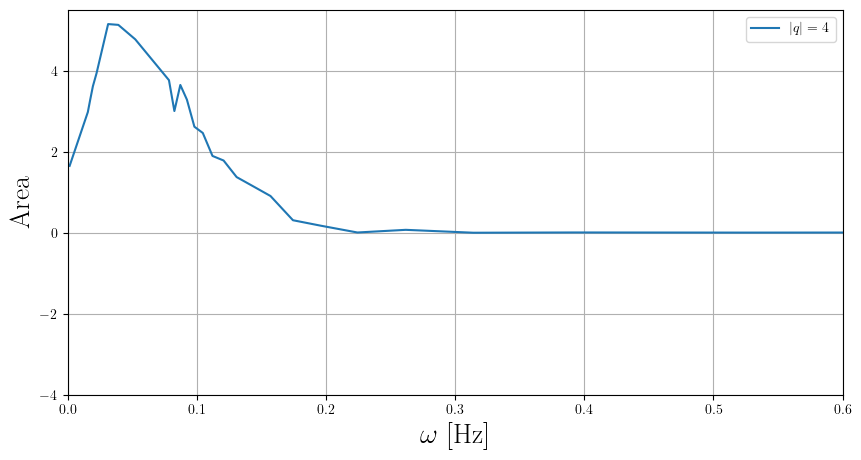

In [57]:
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(omegas, a1p6, label = '$|q|=4$')
#ax.plot(omegas, a2p5, label = '$|q|=2$')
#ax.plot(omegas, a3p4, label = '$|q|=0$')

ax.set_xlim(0,0.6)
ax.set_xlabel('$\\omega$ [Hz]', fontsize=20)

ax.set_ylim(-4,5.5)
ax.set_ylabel('Area', fontsize=20)
ax.grid()
ax.legend()

plt.show()

Sanity check for which areas are being computed 

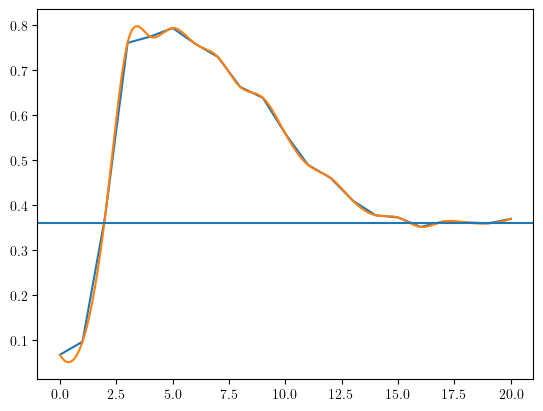

In [145]:
test = IpVI[omegas[0]]
newx, newy = smooth_mesh(fields,test)

idx = get_intersection(newx,newy)

plt.plot(fields,test)
plt.plot(newx,newy)
plt.axhline(newy[idx])

# Animations
So, which animations do I want to make?

1. A fast one
* 3s at 20mT
2. A slow one (1000s)
* 1000s at 20mT

In [11]:
ttime = 1000
B = 5
datapath = f'/home/frieren/BIG/reentrancy/test11/10/{ttime}/{B}mT/'
realization = 1
trj = ice.trajectory(os.path.join(datapath,f'xtrj{realization}.csv'))
trj.load()
v = trj.get_vertices(os.path.join(datapath,f'vertices{realization}.csv'))
savepath = os.path.join(datapath,'frames')

In [12]:
# convert the indices to integers, they sometimes come as floats
trj.trj.index = ice.index_as(trj.trj)
v.vertices.index = ice.index_as(v.vertices)

# get the vertices from each and get the common frames
trj_frames = trj.trj.index.get_level_values('frame').unique().to_numpy()
vrt_frames = v.vertices.index.get_level_values('frame').unique().to_list()

frames = np.intersect1d(vrt_frames,trj_frames)
frames

array([    0,    20,    40,    60,    80,   100,   120,   140,   160,
         180,   200,   220,   240,   260,   280,   300,   320,   340,
         360,   380,   400,   420,   440,   460,   480,   500,   520,
         540,   560,   580,   600,   620,   640,   660,   680,   700,
         720,   740,   760,   780,   800,   820,   840,   860,   880,
         900,   920,   940,   960,   980,  1000,  1020,  1040,  1060,
        1080,  1100,  1120,  1140,  1160,  1180,  1200,  1220,  1240,
        1260,  1280,  1300,  1320,  1340,  1360,  1380,  1400,  1420,
        1440,  1460,  1480,  1500,  1520,  1540,  1560,  1580,  1600,
        1620,  1640,  1660,  1680,  1700,  1720,  1740,  1760,  1780,
        1800,  1820,  1840,  1860,  1880,  1900,  1920,  1940,  1960,
        1980,  2000,  2020,  2040,  2060,  2080,  2100,  2120,  2140,
        2160,  2180,  2200,  2220,  2240,  2260,  2280,  2300,  2320,
        2340,  2360,  2380,  2400,  2420,  2440,  2460,  2480,  2500,
        2520,  2540,

In [13]:
trj.trj.index = trj.trj.index.set_levels([level.astype(int) for level in trj.trj.index.levels])
v.vertices.index = v.vertices.index.set_levels([level.astype(int) for level in v.vertices.index.levels])

In [16]:
time = frames/params['framespersec'].magnitude
theta = time*np.pi/2/ttime * 180/np.pi
titles = [f'$\\theta = {t:.2f}^\\circ $' for t in theta]

In [17]:
%%time
ice.export_frames(trj,v,params,savepath,frames,titles,workers=15)

wip
CPU times: user 29min, sys: 14min 49s, total: 43min 50s
Wall time: 26min 52s


ffmpeg version 6.1.1-3ubuntu5 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 13 (Ubuntu 13.2.0-23ubuntu3)
  configuration: --prefix=/usr --extra-version=3ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --disable-omx --enable-gnutls --enable-libaom --enable-libass --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libglslang --enable-libgme --enable-libgsm --enable-libharfbuzz --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzimg --ena

In [18]:
# i want to rename all frames so that they go from 0 to n
output_file = os.path.join(savepath,'output.mp4')

if os.path.isfile(output_file):
    os.remove(output_file)

written_frames = np.sort([int(x[:-4]) for x in os.listdir(savepath)])

for i,fr in enumerate(written_frames):
    oldfile = os.path.join(savepath,f'{fr}.png')
    newfile = os.path.join(savepath,f'{i}.png')
    os.system(f'mv {oldfile} {newfile}')

mv: '/home/frieren/BIG/reentrancy/test11/10/1000/5mT/frames/0.png' and '/home/frieren/BIG/reentrancy/test11/10/1000/5mT/frames/0.png' are the same file


In [19]:
# running ffmpeg
ipath = f'{savepath}/%d.png'
opath = f'{savepath}/output.mp4'
ffmpeg = [
    'ffmpeg -framerate 15 -i',
    ipath,
    '-vf "scale=trunc(iw/2)*2:trunc(ih/2)*2"',
    '-c:v libx264 -pix_fmt yuv420p',
    opath
]
os.system(' '.join(ffmpeg))

ffmpeg version 6.1.1-3ubuntu5 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 13 (Ubuntu 13.2.0-23ubuntu3)
  configuration: --prefix=/usr --extra-version=3ubuntu5 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --disable-omx --enable-gnutls --enable-libaom --enable-libass --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libglslang --enable-libgme --enable-libgsm --enable-libharfbuzz --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-libzimg --ena

0

# Displacements
Here I try to compute the trj and displacements

In [116]:
ttime = 3 
B = 20
realization = 1

datapath = f'/home/frieren/BIG/reentrancy/test11/10/{ttime}/{B}mT/'
trj = ice.trajectory(os.path.join(datapath,f'xtrj{realization}.csv'))
trj.load()
savepath = os.path.join(datapath,'frames')

In [117]:
ts_horizontal = []
ts_vertical = []

# here i go particle by particle and computing the distance with respecto to the initial position
# as time evolves
# I also separate by horizontals and verticals
for pid, ptrj in trj.trj.groupby('id'):
    rels = ptrj[['cx','cy','cz']]
    dirs = ptrj[['dx','dy','dz']].to_numpy() / params['trap_sep'].magnitude
    if aux.is_horizontal(dirs[0]):
        d = (rels - rels.iloc[0]).apply(lambda x:x**2).sum(axis=1).apply(np.sqrt).values
        ts_horizontal.append(d)
    else: 
        d = (rels - rels.iloc[0]).apply(lambda x:x**2).sum(axis=1).apply(np.sqrt).values
        ts_vertical.append(d)

In [118]:
av_hor = np.mean(np.asarray(ts_horizontal), axis=0) / params['trap_sep'].magnitude
std_hor = np.std(np.asarray(ts_horizontal), axis=0) / params['trap_sep'].magnitude

av_ver = np.mean(np.asarray(ts_vertical), axis=0) / params['trap_sep'].magnitude
std_ver = np.std(np.asarray(ts_vertical), axis=0) / params['trap_sep'].magnitude


In [119]:
frames = trj.trj.index.get_level_values('frame').unique().to_numpy()
theta = frames / params['framespersec'].magnitude * np.pi/2/ttime * 180/np.pi

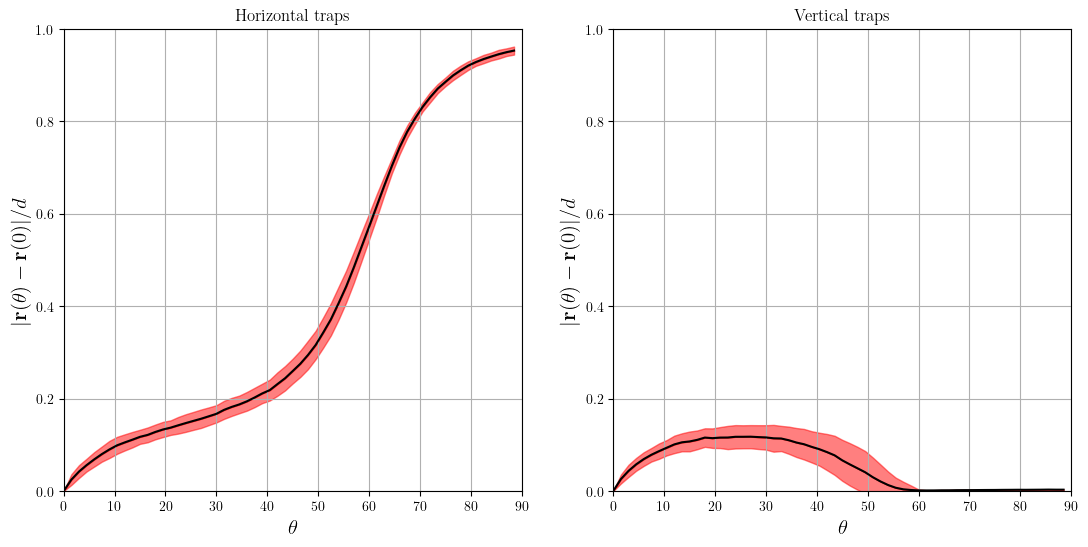

In [121]:
fig, axes = plt.subplots(1,2,figsize=(13,6))

ax = axes[0]
ax.plot(theta,av_hor,color='k')
ax.fill_between(theta,av_hor,av_hor + std_hor, color='r',alpha=0.5)
ax.fill_between(theta,av_hor,av_hor - std_hor, color='r',alpha=0.5)
ax.set_xlabel('$\\theta$',fontsize=15)
ax.set_ylabel('$|\\mathbf{r}(\\theta) - \\mathbf{r}(0)|/d$',fontsize=15)
ax.set_xlim(0,90)
ax.set_ylim(0,1)
ax.set_title('Horizontal traps')
ax.grid()

ax = axes[1]
ax.plot(theta,av_ver,color='k')
ax.fill_between(theta,av_ver,av_ver + std_ver, color='r',alpha=0.5)
ax.fill_between(theta,av_ver,av_ver - std_ver, color='r',alpha=0.5)
ax.set_xlabel('$\\theta$',fontsize=15)
ax.set_ylabel('$|\\mathbf{r}(\\theta) - \\mathbf{r}(0)|/d$',fontsize=15)
ax.set_xlim(0,90)
ax.set_ylim(0,1)
ax.set_title('Vertical traps')
ax.grid()